# Importing libraries

Churn is a one of the biggest problem in  the telecom industry. Research has shown that the average monthly churn rate among the top 4 wireless carriers in the US is 1.9% - 2%. 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt

sns.set(style = 'white')

import os

# Checking the data file 
print(os.listdir("../input"))


['WA_Fn-UseC_-Telco-Customer-Churn.csv']


# Reading the dataset

In [2]:
telecom_customer_data = pd.read_csv('../input/WA_Fn-UseC_-Telco-Customer-Churn.csv')
telecom_customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Checking the column names
telecom_customer_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Note: After a quick look at the column name description from [link](https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113), we have following information at our disposal:

1. CustomerID: The customer for whom data was data was collected.
2. gender= Gender of the customer
3. SeniorCitizen: Whether the customer is 65 years or older.
4. Partner: Indicates if the customer is married or not.
5. Dependents: If the customer lives with dependents.
6. tenure: Total number of months for which the customer has been with the company till end of the quarter 3.
7. Phoneservice: If the customer subscribes to home phone service.
8. Multiplelines: If mulitple telephone lines have been subscribes to.
9. Internet service:If the customer has taken internet services
10. OnlineSecurity: If the cusomter has taken online security
11. DeviceProtection: If customer has subscribes to device protection plan for the internet related devices.
12. Tech support: If customer has subscribed to tech support with min wait times.
13. StreamingTV: If customer uses internet services to stream TV
14. StreamingMovies: If customer uses internet services to stream movies.
15. Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
16. PaperlessBilling: Indicates if the customer has chosen paperless billing: Yes, No
17. PaymentMethod: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
18. MonthlyCharges: Indicates the customer’s current total monthly charge for all their services from the company.
19. TotalCharges: Indicates the customer’s total charges, calculated to the end of the quarter 3.
20. Churn: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

# Exploratory Data Analysis

In [4]:
# Checking the data types of all the columns
telecom_customer_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
# We see that total charges is of type object, we need to convert it into numeric value
# telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')
# telecom_cust.isnull().sum()
telecom_customer_data['TotalCharges']=pd.to_numeric(telecom_customer_data['TotalCharges'],errors='coerce')


In [6]:
# After converting the TotalCharges column to contain numeric value, NaNs were introduced in that column
telecom_customer_data.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# Handling missing values

After looking at the above output, we can say that there are 11 missing values for Total Charges. Let us replace remove these 11 rows from our data set

**Note: try other method of handling as well**

In [7]:
telecom_customer_data.shape

(7043, 21)

In [8]:
# Removing rows with missing values
telecom_customer_data.dropna(inplace = True)


# Removing customer Id from dataset as it will not be useful in our analysis
telecom_customer_data_no_customerid=telecom_customer_data.drop(['customerID'],axis=1)


# Converting Churn categorical variable to numerical variable
telecom_customer_data_no_customerid['Churn']=[1 if x=="Yes" else 0 for x in telecom_customer_data_no_customerid['Churn']]




In [9]:
# Converting all categorical data into numerical data
telecom_customer_data_no_customerid_dummies = pd.get_dummies(telecom_customer_data_no_customerid)
telecom_customer_data_no_customerid_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [10]:

telecom_customer_data_no_customerid_dummies.shape

(7032, 46)

Text(0.5,1,'Correlation of churn with all the other predictors')

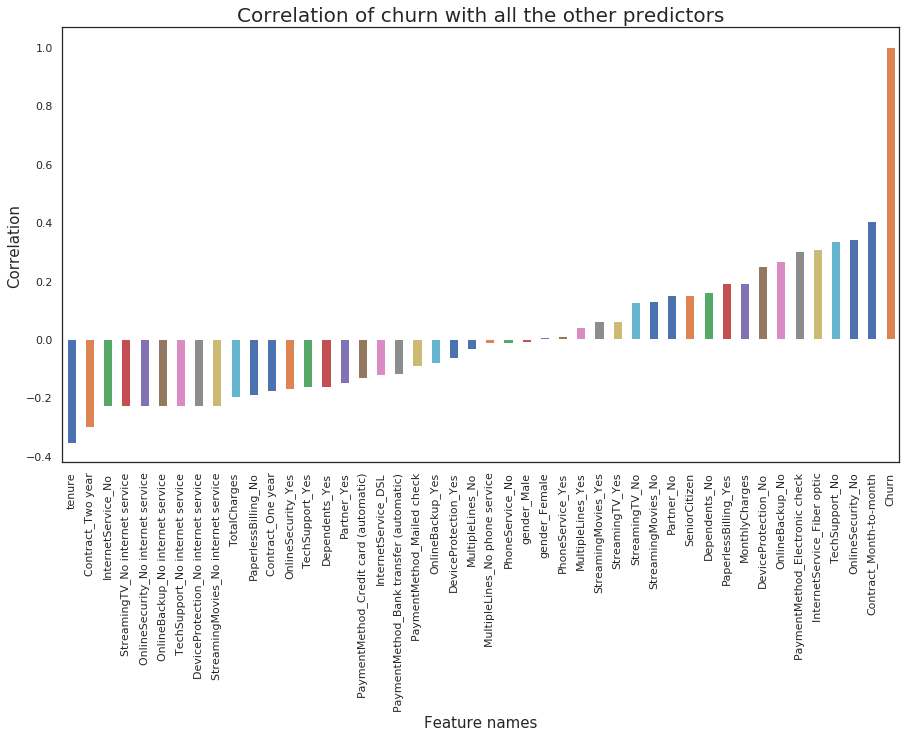

In [11]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
telecom_customer_data_no_customerid_dummies.corr()['Churn'].sort_values(ascending = True).plot(kind='bar')
plt.ylabel("Correlation",fontsize=15)
plt.xlabel("Feature names",fontsize=15)
plt.title("Correlation of churn with all the other predictors",fontsize=20)

* **Inference**: Month to month contracts, absence of online security and tech support are positive correlated with Churn. Long term contracts, tech support, streaming service without internet connection are positively correlated with Churn

## Let's look into the data to understand and pick patterns

### A. Demographics of the population

**Gender Distribution** - About half of the customers in our data set are male while the other half are female

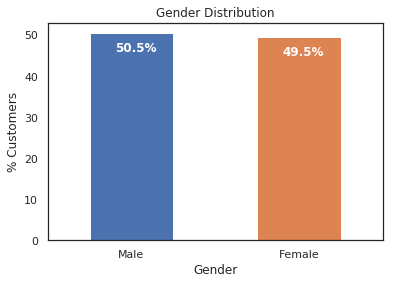

In [12]:
ax = (telecom_customer_data['gender'].value_counts()*100.0 /len(telecom_customer_data)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0)
                                                                

ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')


for i in ax.patches:
    
    ax.text(i.get_x()+.15, i.get_height()-4.5, \
            str(round((i.get_height()), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

**% Senior Citizens** - There are only 16% of the customers who are senior citizens. Thus most of our customers in the data are younger people.


Text(0.5,1,'% of Senior Citizens')

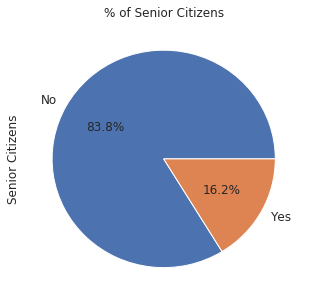

In [13]:
ax = (telecom_customer_data['SeniorCitizen'].value_counts()*100.0 /len(telecom_customer_data))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

3. **Partner and dependent status**  - About 50% of the customers have a partner, while only 30% of the total customers have dependents. 

In [14]:
after_melting = pd.melt(telecom_customer_data, id_vars=['customerID'], value_vars=['Dependents','Partner'])
after_melting_count = after_melting.groupby(['variable','value']).count().unstack()
after_melting_count = after_melting_count*100/len(telecom_customer_data)


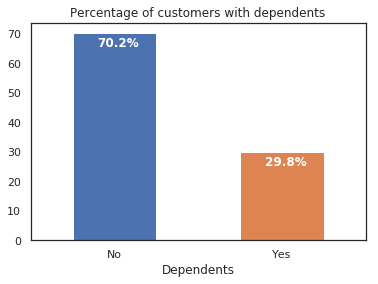

In [15]:
ax=after_melting_count.customerID.loc['Dependents',:].plot.bar(rot=0)
ax.set_xlabel("Dependents")
ax.set_title("Percentage of customers with dependents")
for i in ax.patches:
    
    ax.text(i.get_x()+.15, i.get_height()-4.5, \
            str(round((i.get_height()), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')


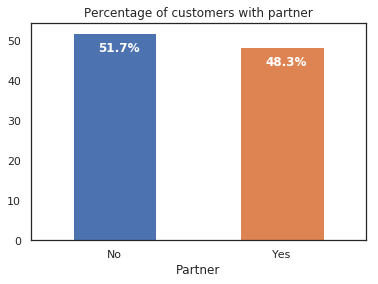

In [16]:
ax=after_melting_count.customerID.loc['Partner',:].plot.bar(rot=0)
ax.set_xlabel("Partner")
ax.set_title("Percentage of customers with partner")
for i in ax.patches:
    
    ax.text(i.get_x()+.15, i.get_height()-4.5, \
            str(round((i.get_height()), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

4. **Customers with partners and dependents combined**

In [17]:
partner_dependents = telecom_customer_data.groupby(['Partner','Dependents']).size().unstack()



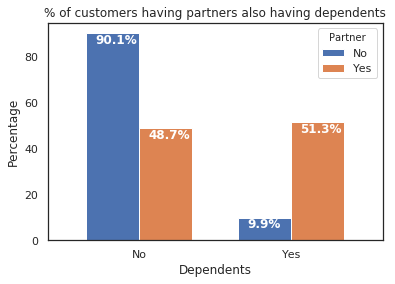

In [18]:
ax=(partner_dependents.T*100/partner_dependents.T.sum(axis=0)).plot.bar(width=0.7,rot=0)

ax.set_ylabel("Percentage")
ax.set_title("% of customers having partners also having dependents")

for i in ax.patches:
    
    ax.text(i.get_x()+.06, i.get_height()-4.5, \
            str(round((i.get_height()), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

* **Inference** : Approx 50% of Customers who have partners also have dependents. Of the customers that don't have partners, about 90% of them also don't have dependents

### B.) Customer and his/her relationship with the company

**1. Tenure:**  

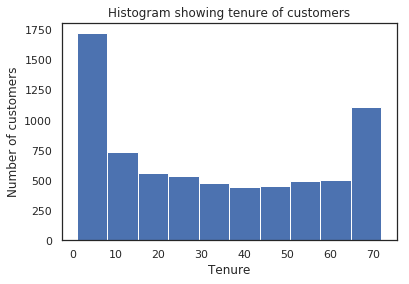

In [19]:
plt.hist(telecom_customer_data['tenure'],bins=10)
plt.xlabel("Tenure")
plt.ylabel("Number of customers")
plt.title("Histogram showing tenure of customers")
plt.show()

In [20]:

telecom_customer_data['tenure'].value_counts().sort_values(ascending=False)[:2]

1     613
72    362
Name: tenure, dtype: int64

* **Inference** : Looking at the above plot, we can say that the number of customers who are associated with the company for a month is the most. The second highest number is when the tenure is 72 months.

**2. Contracts:** To understand the above graph, lets first look at the # of customers by different contracts. 

Text(0.5,1,'Number of Customers by Contract Type')

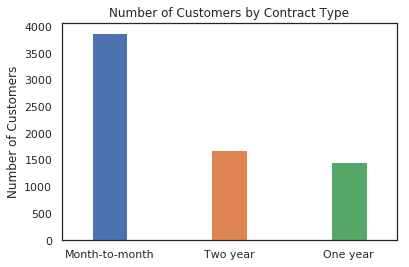

In [21]:
ax = telecom_customer_data['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Customers by Contract Type')

* **Inference**: As we can see from this graph most of the customers are in the month to month contract and from the above graph on tenure, we saw that most of the customers had been with the company for about a month until the end of the quarter.



3. **Understanding relationship between contracts and tenure**

Text(0.5,1,'Two Year Contract')

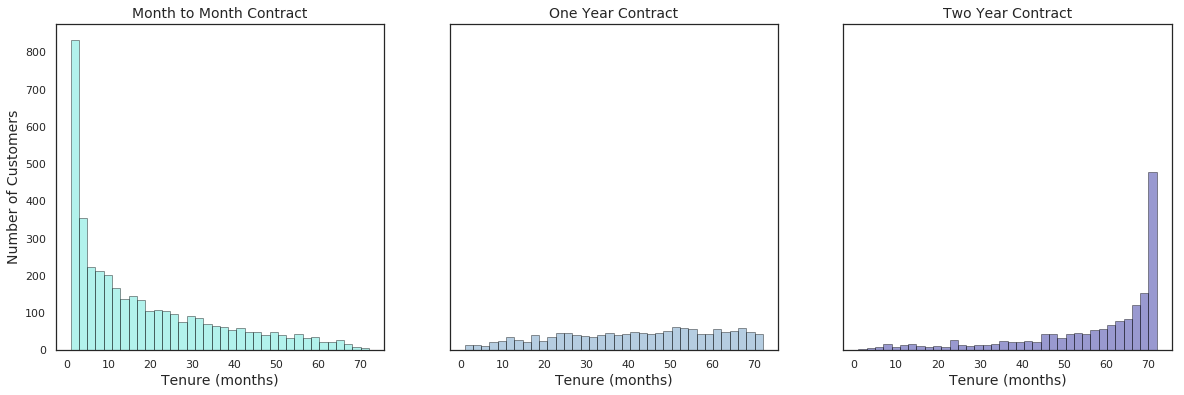

In [22]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(telecom_customer_data[telecom_customer_data['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('Number of Customers',size = 14)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('Month to Month Contract',size = 14)

ax = sns.distplot(telecom_customer_data[telecom_customer_data['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(telecom_customer_data[telecom_customer_data['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('Two Year Contract',size = 14)

* **Inference** : Most of the customers with a month to month contract have less tenure. The thing to note here is that as the tenure is increasing, the number of customers with this contract type are decreasing.For most of the customers with a two year contract, the thing to note is that as the tenure is increasing, the number of customers with this contract type is increasing. So customers with a contract type of 2 years are more loyal to the company.



###  C. Let us now look at the distribution of various services used by customers

In [23]:

telecom_customer_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

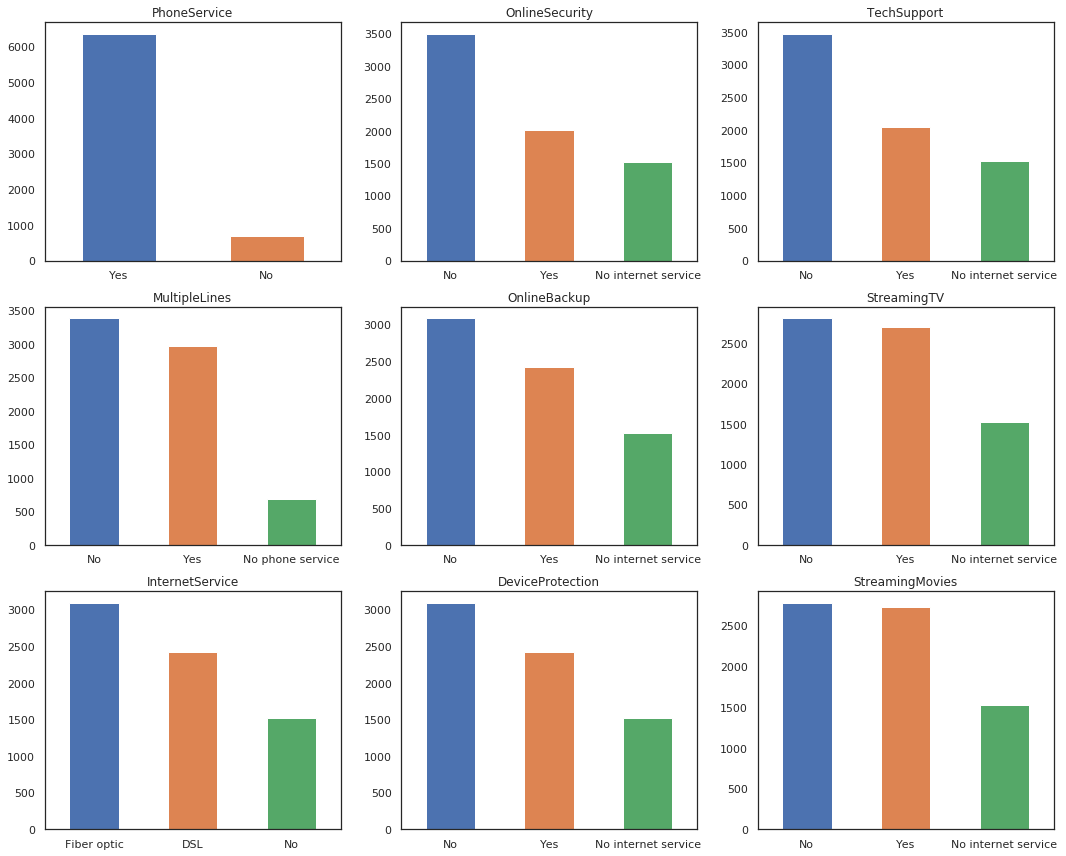

In [24]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = telecom_customer_data[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = telecom_customer_data[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = telecom_customer_data[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)
plt.tight_layout()

### D. Relationship between churn and other predictors

1. **Lets first look at the churn rate in our data**

Text(0.5,1,'Churn Rate for the company')

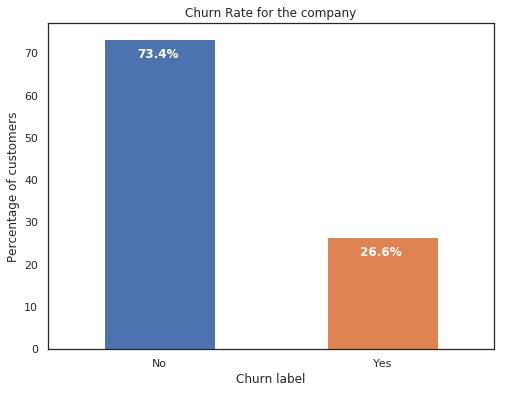

In [25]:
ax = (telecom_customer_data['Churn'].value_counts()*100.0 /len(telecom_customer_data)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                         figsize = (8,6))
for i in ax.patches:
    
    ax.text(i.get_x()+.15, i.get_height()-4.5, \
            str(round((i.get_height()), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')
    
ax.set_xlabel("Churn label")
ax.set_ylabel("Percentage of customers")
ax.set_title("Churn Rate for the company")


* **Interpretation** : The data is imbalanced. We have approx 70% of the customers who don't churn

2. **Churn vs Tenure** : As we can see form the below plot, customers who have been with the company for a longer tenure, don't churn. However, there are outliers in the case where customers churn


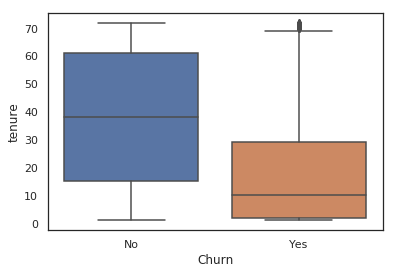

In [26]:
sns.boxplot(x = telecom_customer_data.Churn, y = telecom_customer_data.tenure)

In [27]:
telecom_customer_data["Churn"]=telecom_customer_data["Churn"].astype("str")

In [28]:
# These are the outliers based on the above boxplot
len(telecom_customer_data[(telecom_customer_data['Churn']=="Yes") & (telecom_customer_data['tenure']>70)])

12

Notes to me: 

Case 1: I don't drop these outliers

Case 2: I drop these outliers

Case 3: I handle them in a different way

**3. Churn by Contract Type**: Similar to what we saw in the correlation plot, the customers who have a month to month contract have a very high churn rate.

Text(0.5,1,'Churn by Contract Type')

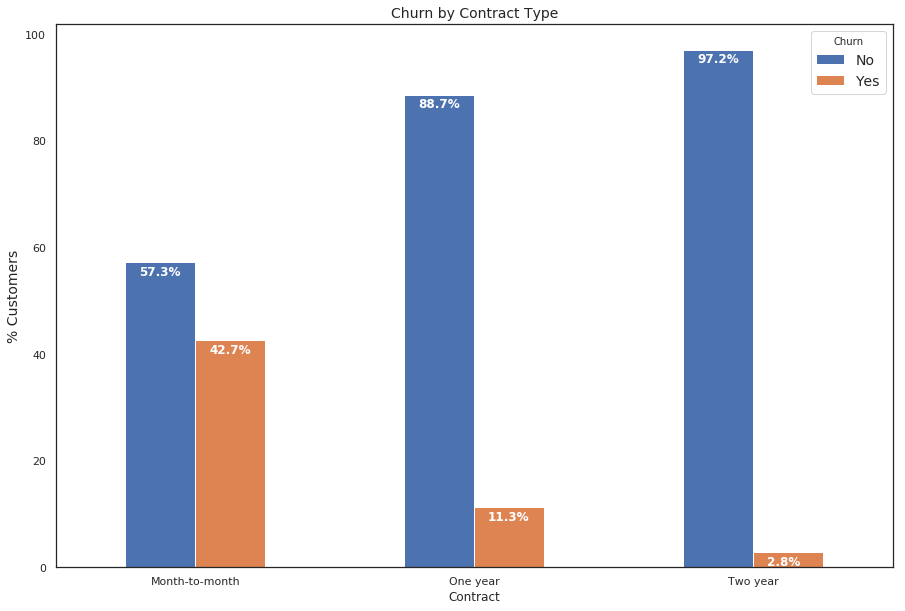

In [29]:
contract_churn = telecom_customer_data.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.5,
                                                                rot = 0, 
                                                                figsize = (15,10))


for i in ax.patches:
    
    ax.text(i.get_x()+.05, i.get_height()-2.5, \
            str(round((i.get_height()), 1))+'%',
            fontsize=12,
            color='White',
           weight = 'bold')

ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)


**4. Churn by Seniority**: Senior Citizens have almost double the churn rate than younger population.

Text(0.5,1,'Churn by Seniority')

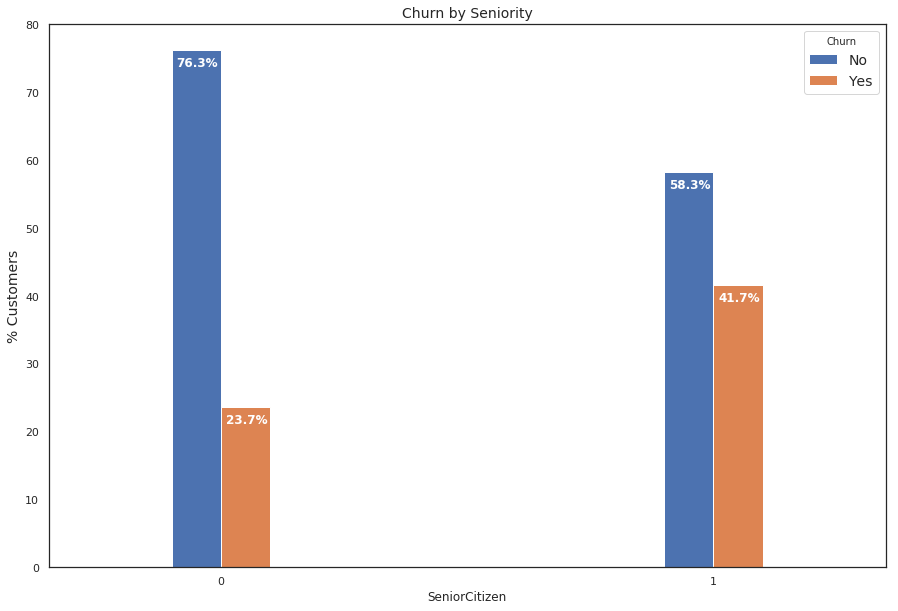

In [30]:
seniority_churn = telecom_customer_data.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                rot = 0, 
                                                                figsize = (15,10))

for i in ax.patches:
    
    ax.text(i.get_x()+.01, i.get_height()-2.5, \
            str(round((i.get_height()), 1))+'%',
            fontsize=12,
            color='White',
           weight = 'bold')

ax.legend(loc='best', prop={'size': 14}, title='Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Seniority',size = 14)
                                                                

**4. Churn by Monthly Charges**: Higher % of customers churn when the monthly charges are high.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Distribution of monthly charges by churn')

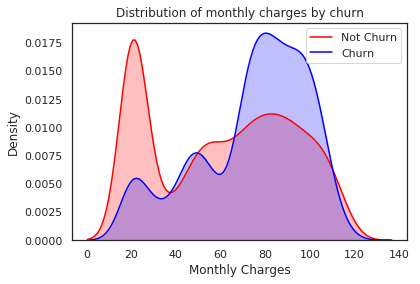

In [31]:
ax = sns.kdeplot(telecom_customer_data.MonthlyCharges[(telecom_customer_data["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_customer_data.MonthlyCharges[(telecom_customer_data["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')


**v.) Churn by Total Charges**: It seems that there is higer churn when the total charges are lower.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Distribution of total charges by churn')

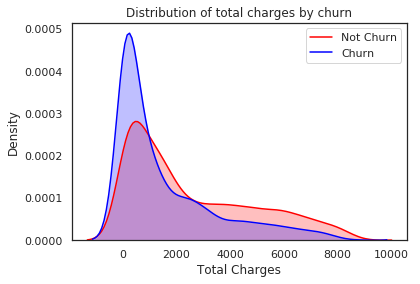

In [32]:
ax = sns.kdeplot(telecom_customer_data.TotalCharges[(telecom_customer_data["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_customer_data.TotalCharges[(telecom_customer_data["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

To be continued....